# 1. 크롤링 순서
1. 브라우저 열기
2.웹페이지 접속
3. 내가 원하는 정보 있는지 확인
4. 브라우저가 가진 데이터(html) 다운받기 - beautifulsoup library
5. 원하는 정보가 있는 태그 찾기! --> 정보만추출/ 정리 - select

--> selenium 설치

In [1]:
!pip install selenium
!pip install chromedriver-autoinstaller

파이썬 selenium 라이브러리를 이용해 chromedriver.exe를 조작해 chrome을 이용하는데, 이때 최신 브라우저 버전이 아니면 버전 오류가 뜬다 따라서 브라우저를 열기 전 무조건 크롬드라이버 최신 버전으로 설치를 진행한 뒤 브라우저를 열자 

In [2]:
import chromedriver_autoinstaller
from selenium import webdriver
from bs4 import BeautifulSoup #html에서 원하는 내용을 찾아주는 라이브러리

chromedriver_autoinstaller.install() # chromedriver 최신버전설치 - 무조건 먼저 해주자
browser = webdriver.Chrome()    # 브라우저 열기

In [3]:
url = 'https://naver.com'
browser.get(url) #해당 url 열기 - 브라우저 안열고 실행하면 오류남

'<html lang="ko" data-dark="false" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36"><head><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:u
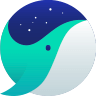
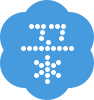

In [4]:
browser.page_source #컴퓨터가 바라본 웹페이지

<html data-dark="false" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36" lang="ko"><head><script async="" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js" type="text/javascript"></script> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"/> <meta content="index,nofollow" name="robots"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta cont
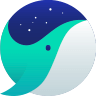
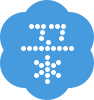

In [5]:
#html을 다운받고 해석하는 부분(beautiful soup으로 읽으면 해석이 가능)
BeautifulSoup(browser.page_source, "html.parser")

***

# 2. 다시 해보자

url을 보고 들어가자 - url로 바로 접근할 수 있으면 훨씬 쉬워진다

- url : '주소' + '?' + '파라미터(변수1 = 값 & 변수2 = 값 & 변수3 = 값....)'


? 앞까지는 주소, ? 뒤부터는 파라미터 로 구성

예시)

https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EB%B6%80%EB%8F%99%EC%82%B0

클릭해서 바뀐 부분의 파라미터가 내가 방금 클릭한 부분의 정보를 가지고 있다

데이터 수집 과정에서부터 어떻게 분석할지를 생각하고 뽑아내자

In [6]:
#브라우저 닫기
# browser.close()

In [7]:
word_list = ['하민세', '데이터분석', '부동산', '주식', '해외주식']
# url_naver = f'https://search.naver.com/search.naver?where=news&sm=tab_jum&query={word}'
# print(url_naver)

In [8]:
#여러 창 동시에 띄우기
for word in word_list:
    url_naver = f'https://search.naver.com/search.naver?where=news&sm=tab_jum&query={word}'
    print(url_naver)
    browser.get(url_naver)

https://search.naver.com/search.naver?where=news&sm=tab_jum&query=하민세
https://search.naver.com/search.naver?where=news&sm=tab_jum&query=데이터분석
https://search.naver.com/search.naver?where=news&sm=tab_jum&query=부동산
https://search.naver.com/search.naver?where=news&sm=tab_jum&query=주식
https://search.naver.com/search.naver?where=news&sm=tab_jum&query=해외주식


***

# 3. 다음 뉴스 크롤링하기

In [9]:
url = 'https://news.v.daum.net/v/20160310190303578'
browser.get(url)  # 페이지 접속하기

In [10]:
#브라우저 화면 내용을 고정해 저장하기
# browser.page_source

In [11]:
# soup이라는 변수에 화면 고정해 해석한 정보 저장
soup = BeautifulSoup(browser.page_source, 'html.parser') #beautifulsoup으로 html 번역할거라는 것

## 고정해 해석한 화면에 원하는 내용 찾기

soup.select('조건!!!')

#### HTML 형식

- <태그명 속성1= 값1 속성2 = 값2> 내용 </태그명>
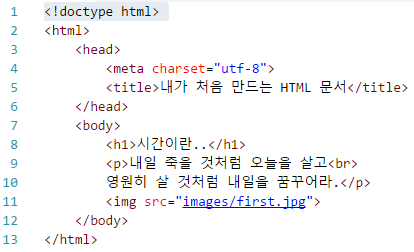

- 태그는 상하관계가 존재함(indent로 부모 자식 찾음)
- 같은 indent 레벨의 태그는 sibling이라고 부름
- 주로 사용하는 태그명, 파라미터 - <태그명 class = 값 id = 값>
- 태그명, class, id만 써도 다 찾을 수 있다!!1
- class : . / id : #

In [12]:
soup.select('h3') #태그명이 h3인 경우 다 찾아줘

[<h3 class="tit_view" data-translation="true">이세돌 "알파고의 완승, 완벽한 대국 펼쳤다"</h3>,
 <h3 class="tit_cp">오마이뉴스 주요 뉴스</h3>,
 <h3 class="txt_newsview">포토&amp;TV</h3>,
 <h3 class="txt_newsview">이 시각 추천뉴스</h3>]

In [13]:
len(soup.select('h3'))

4

제목만 뽑아야하는데 4개나 나옴 : 조건을 더 주자!!

In [14]:
soup.select('.tit_view') #class 속성이 tit_view인 태그 다 찾아줭

[<h3 class="tit_view" data-translation="true">이세돌 "알파고의 완승, 완벽한 대국 펼쳤다"</h3>]

. 의 의미는 'class ='  이라는 의미다! class만 .을 쓸 수 있음!!!

In [15]:
soup.select('h3.tit_view') #태그명 h3, class 명 tit_view인 태그 찾아줘

[<h3 class="tit_view" data-translation="true">이세돌 "알파고의 완승, 완벽한 대국 펼쳤다"</h3>]

***

# 4. 원하는 태그 정보 찾기
0. 브라우저 클릭
1. F12 눌러서 개발자 도구 들어가기
2. Elements 탭 들어가기
3. 좌측 상단 select an element in the page 
4. 원하는 정보 누르기

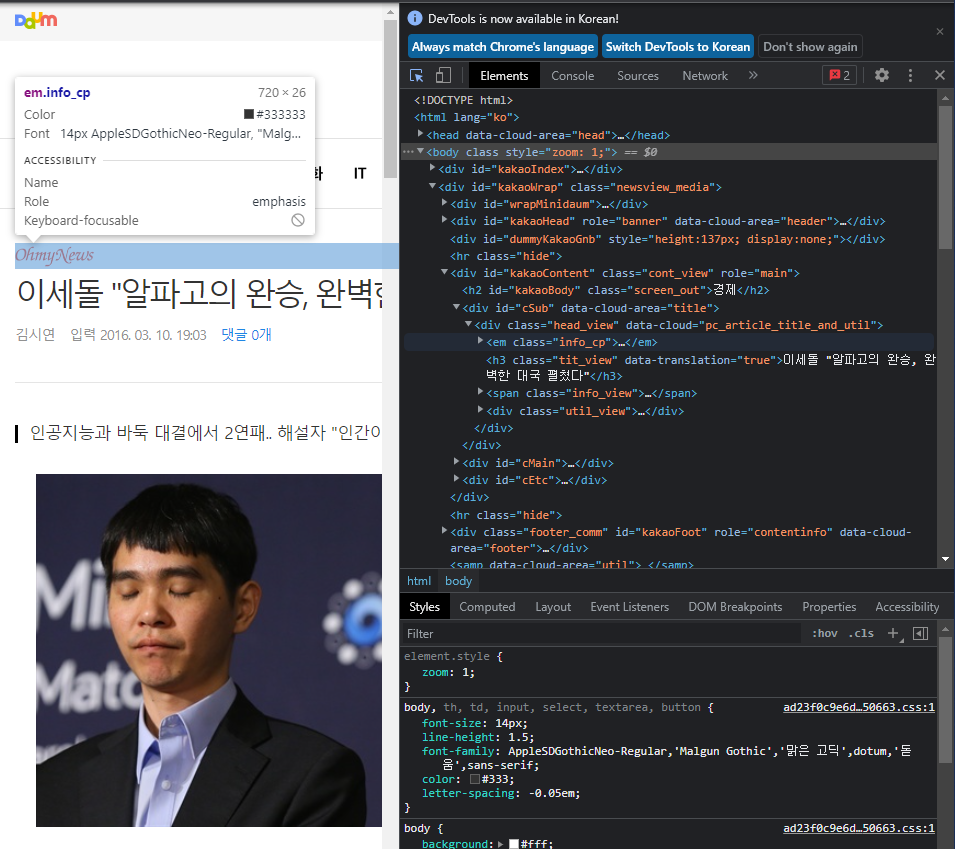

In [16]:
title = soup.select('h3.tit_view')
len(title)

1

In [17]:
# 화면에 보이는 글만 가져오기
soup.select('h3.tit_view')[0].text # 0의 의미?


'이세돌 "알파고의 완승, 완벽한 대국 펼쳤다"'

soup.select('h3.tit_view')는 리스트 안에 태그를 반환함(길이 1짜리)

In [18]:
#soup.select('부모태그 > 자식태그')
soup.select('div > h3.tit_view') #div 태그 아래 h3.tit_view 찾아줘!


[<h3 class="tit_view" data-translation="true">이세돌 "알파고의 완승, 완벽한 대국 펼쳤다"</h3>]

In [19]:
#soup.select('부모태그 > 자식태그')
# 태그명이 h3.tit_view고 부모 태그의 
# class가 head_view 찾아줘

soup.select('.head_view > h3.tit_view')

[<h3 class="tit_view" data-translation="true">이세돌 "알파고의 완승, 완벽한 대국 펼쳤다"</h3>]

'#' : soup.select('#cSub') -- id 값이 cSub인 값 다 찾아줘!


In [20]:
soup.select('#cSub> div >h3.tit_view')

[<h3 class="tit_view" data-translation="true">이세돌 "알파고의 완승, 완벽한 대국 펼쳤다"</h3>]

In [21]:
#오마이 뉴스 찾기
press = soup.select('a > img.thumb_g')
press[0]['alt'] # 속성명을 쳐서 가져올 수 있다. 
press[0]

<img alt="Daum" class="thumb_g" height="19" src="//t1.daumcdn.net/media/news/news2016/retina/logo_daum.jpg" width="45"/>

참고 : 이미지도 가져올 수 있음 - urllib.request (알아보기)

***

# 5. 정보가 나타나도록 브라우저 조작

클릭/입력/삭제 - 이게 매크로나 다름 없음

In [22]:
browser.get('https://www.naver.com/')

In [23]:
word_part = browser.find_elements_by_css_selector('#query')[0] #검색창 위치
word_part.clear()
#selenim형식의 특정위치로 나옴

C:\Users\USER\AppData\Local\Temp/ipykernel_26172/2251514432.py:1: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  word_part = browser.find_elements_by_css_selector('#query')[0]


In [24]:
word_part.send_keys('파이썬') # 검색창에 글자 넣기

In [25]:
go_btn = browser.find_elements_by_css_selector('#search_btn')[0]# 검색 버튼 찾기
go_btn.click()

C:\Users\USER\AppData\Local\Temp/ipykernel_26172/1757353854.py:1: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  go_btn = browser.find_elements_by_css_selector('#search_btn')[0]
